In [84]:
# Import the necessary libraries.h
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [102]:
data = pd.read_csv('Full_Data_Completa_emocion.csv')
data

,duracion,Nivel de ruido (dB),movimiento,Gold_Blue_diff,Gold_Red_diff,Emocion
0,00:05,0.601360,5.556363,0.0,0.00,0
1,00:10,1.396742,6.489755,0.2,0.00,0
2,00:15,0.667154,10.997008,0.0,0.20,0
3,00:20,1.111844,10.966059,0.3,0.10,0
4,00:25,1.386834,6.791949,0.0,0.00,0
...,...,...,...,...,...,...
322,26:55:00,1.810151,3.196931,0.1,0.11,0
323,27:00:00,2.423793,8.640971,0.2,0.19,0
324,27:05:00,3.587291,12.450398,0.1,0.10,0
325,27:10:00,3.128957,5.223480,0.1,0.10,1


In [103]:
# Limpieza de nombres de columnas

# Rename the columns so they follow the PE8 (snake case).
import janitor

# Renombrar columnas en snake case
data = data.rename(columns=str.lower)
data = data.clean_names()

print(data.head())

  duracion  nivel_de_ruido_db_  movimiento  gold_blue_diff  gold_red_diff  \
0    00:05            0.601360    5.556363             0.0            0.0   
1    00:10            1.396742    6.489755             0.2            0.0   
2    00:15            0.667154   10.997008             0.0            0.2   
3    00:20            1.111844   10.966059             0.3            0.1   
4    00:25            1.386834    6.791949             0.0            0.0   

   emocion  
0        0  
1        0  
2        0  
3        0  
4        0  


In [94]:
print(data.dtypes)

duracion               object
nivel_de_ruido_db_    float64
movimiento            float64
gold_blue_diff        float64
gold_red_diff         float64
emocion                 int64
dtype: object


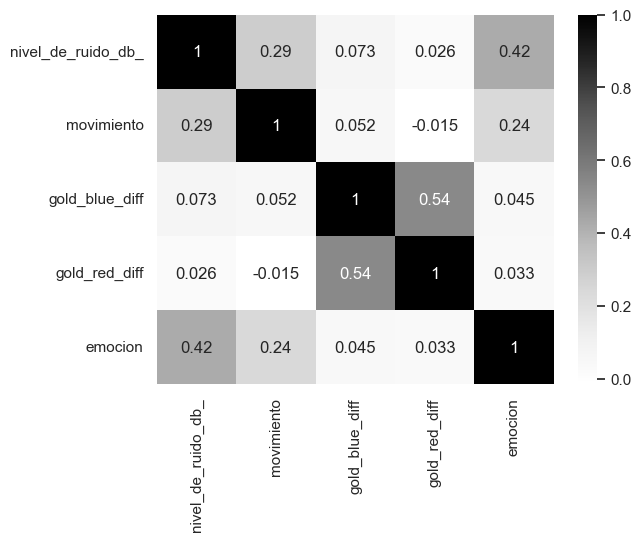

In [104]:


# Plot a correlation matrix, and comment on what you observe.

correlation_matrix = data.corr()

# Crear el mapa de calor de la matriz de correlación con números y esquema de colores personalizado
sns.heatmap(correlation_matrix, cmap="Greys", annot=True)

# Mostrar el gráfico
plt.show()

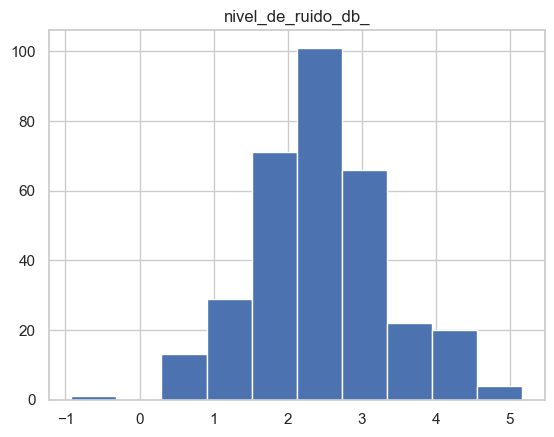

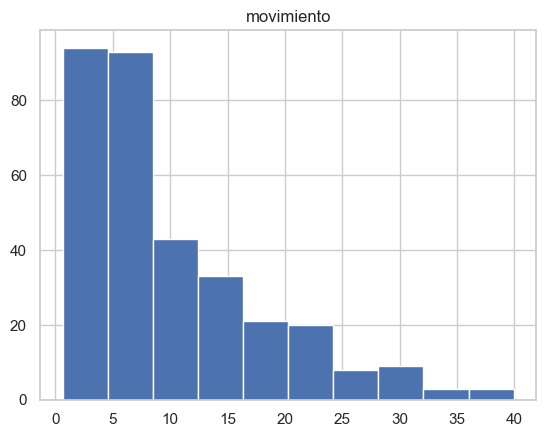

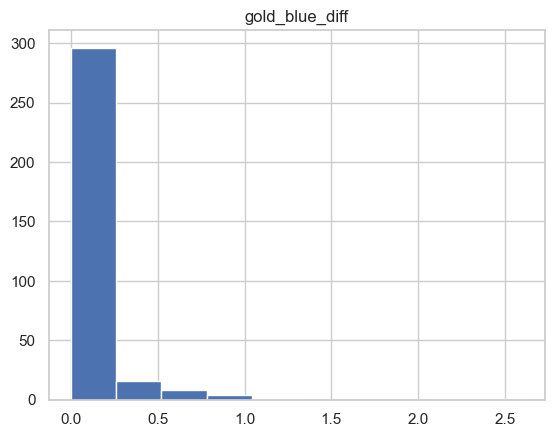

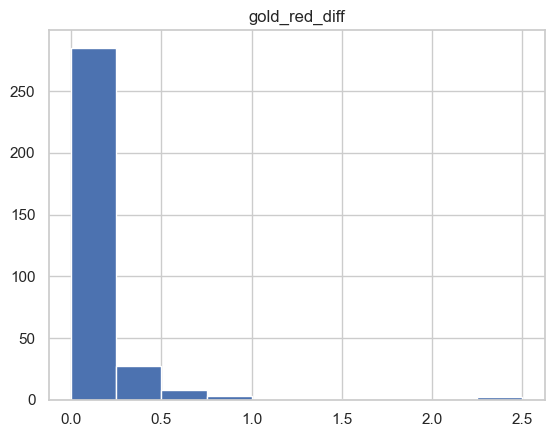

In [62]:
data =  data.drop(['emocion'], axis=1)
# Plot every continuous variable. Comment what you can see in the plots.
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns
#
cate_cols = data.select_dtypes(include=["object"]).columns


# Crear un histograma para cada columna numérica
for col in numeric_cols:
    data[col].hist()
    plt.title(col)
    plt.show()

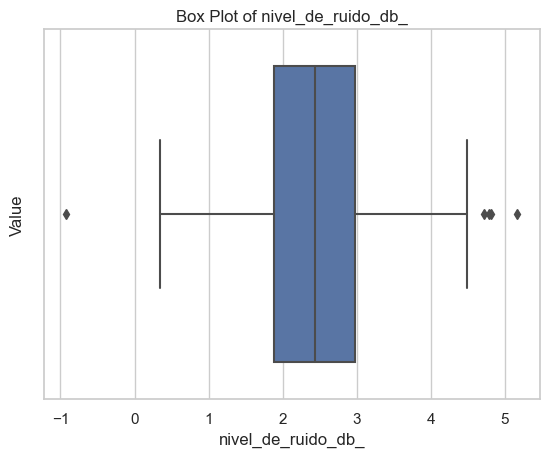

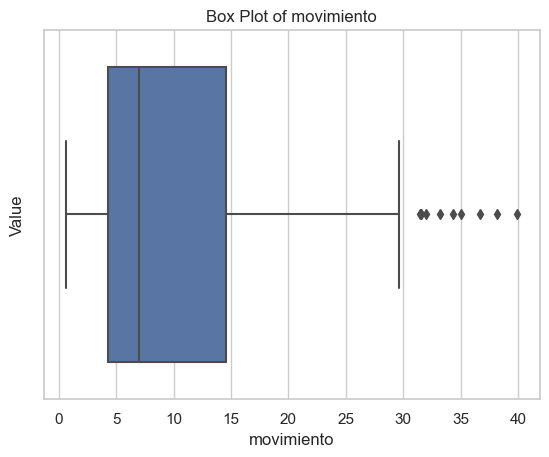

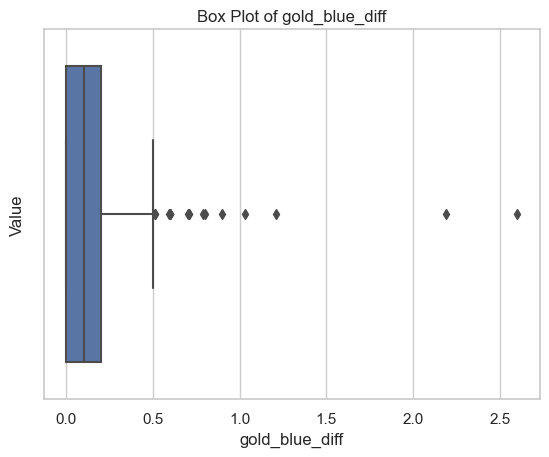

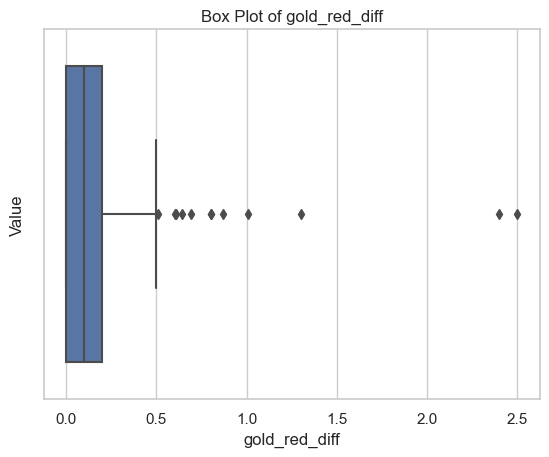

In [63]:
import seaborn as sns

def plot_boxplots(data):
    """
    Plot a box plot for each column in a given DataFrame.

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the columns to plot.

    Returns:
    None
    """
    sns.set(style="whitegrid")
    for column in data.columns:
        if data[column].dtype != "object":
            ax = sns.boxplot(data[column])
            ax.set_title(f"Box Plot of {column}")
            ax.set_xlabel(column)
            ax.set_ylabel("Value")
            plt.show()
            
plot_boxplots(data)

In [105]:
# Check all columns for NaN values. Decide what (if anything) you will need to do with them.
nan_counts = data.isna().sum(axis=0)

print(nan_counts)

duracion              0
nivel_de_ruido_db_    0
movimiento            0
gold_blue_diff        0
gold_red_diff         0
emocion               0
dtype: int64


In [106]:
## transformar la data 
numeric_cols = data.select_dtypes(include=["float64", "int64"])
cate_cols = data.select_dtypes(include=["object"])
numeric_cols

,nivel_de_ruido_db_,movimiento,gold_blue_diff,gold_red_diff,emocion
0,0.601360,5.556363,0.0,0.00,0
1,1.396742,6.489755,0.2,0.00,0
2,0.667154,10.997008,0.0,0.20,0
3,1.111844,10.966059,0.3,0.10,0
4,1.386834,6.791949,0.0,0.00,0
...,...,...,...,...,...
322,1.810151,3.196931,0.1,0.11,0
323,2.423793,8.640971,0.2,0.19,0
324,3.587291,12.450398,0.1,0.10,0
325,3.128957,5.223480,0.1,0.10,1


In [107]:
numeric_cols = numeric_cols[['nivel_de_ruido_db_','movimiento','gold_blue_diff','gold_red_diff']]
print(numeric_cols.head())

   nivel_de_ruido_db_  movimiento  gold_blue_diff  gold_red_diff
0            0.601360    5.556363             0.0            0.0
1            1.396742    6.489755             0.2            0.0
2            0.667154   10.997008             0.0            0.2
3            1.111844   10.966059             0.3            0.1
4            1.386834    6.791949             0.0            0.0


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import boxcox

# Carga de los datos de ejemplo
df = numeric_cols
# Aplicar transformación logarítmica a todas las columnas
df = df.applymap(lambda x: np.log(x+1))
# Imprimir el resultado
print(df.head())


   nivel_de_ruido_db_  movimiento  gold_blue_diff  gold_red_diff
0            0.470853    1.880436        0.000000       0.000000
1            0.874110    2.013536        0.182322       0.000000
2            0.511118    2.484657        0.000000       0.182322
3            0.747561    2.482074        0.262364       0.095310
4            0.869968    2.053091        0.000000       0.000000


In [109]:
data_transformed = df
data_transformed

,nivel_de_ruido_db_,movimiento,gold_blue_diff,gold_red_diff
0,0.470853,1.880436,0.000000,0.000000
1,0.874110,2.013536,0.182322,0.000000
2,0.511118,2.484657,0.000000,0.182322
3,0.747561,2.482074,0.262364,0.095310
4,0.869968,2.053091,0.000000,0.000000
...,...,...,...,...
322,1.033238,1.434354,0.095310,0.104360
323,1.230749,2.266022,0.182322,0.173953
324,1.523290,2.599009,0.095310,0.095310
325,1.418025,1.828329,0.095310,0.095310


In [110]:
from sklearn import preprocessing

cate_cols = cate_cols.apply(preprocessing.LabelEncoder().fit_transform)
cate_cols 

,duracion
0,0
1,1
2,2
3,3
4,4
...,...
322,322
323,323
324,324
325,325


In [111]:
data_final = pd.concat([data_transformed,cate_cols], axis=1)
data_final

,nivel_de_ruido_db_,movimiento,gold_blue_diff,gold_red_diff,duracion
0,0.470853,1.880436,0.000000,0.000000,0
1,0.874110,2.013536,0.182322,0.000000,1
2,0.511118,2.484657,0.000000,0.182322,2
3,0.747561,2.482074,0.262364,0.095310,3
4,0.869968,2.053091,0.000000,0.000000,4
...,...,...,...,...,...
322,1.033238,1.434354,0.095310,0.104360,322
323,1.230749,2.266022,0.182322,0.173953,323
324,1.523290,2.599009,0.095310,0.095310,324
325,1.418025,1.828329,0.095310,0.095310,325


In [135]:
y = pd.read_csv('Full_Data_Completa_emocion.csv')
y = y[['Emocion']]
X = data_final.drop(['duracion'], axis=1)


In [138]:
print(y)
print(X)

     Emocion
0          0
1          0
2          0
3          0
4          0
..       ...
322        0
323        0
324        0
325        1
326        1

[327 rows x 1 columns]
     nivel_de_ruido_db_  movimiento  gold_blue_diff  gold_red_diff
0              0.470853    1.880436        0.000000       0.000000
1              0.874110    2.013536        0.182322       0.000000
2              0.511118    2.484657        0.000000       0.182322
3              0.747561    2.482074        0.262364       0.095310
4              0.869968    2.053091        0.000000       0.000000
..                  ...         ...             ...            ...
322            1.033238    1.434354        0.095310       0.104360
323            1.230749    2.266022        0.182322       0.173953
324            1.523290    2.599009        0.095310       0.095310
325            1.418025    1.828329        0.095310       0.095310
326            1.412294    1.957793        0.000000       0.122218

[327 rows x 4 c

Precisión del modelo: 0.79
Ecuación de la regresión logística: y = 1 / (1 + e^(-(nivel_de_ruido_db_ * 2.21 + movimiento * 0.79 + gold_blue_diff * 0.03 + gold_red_diff * -0.12 + (-5.76))))


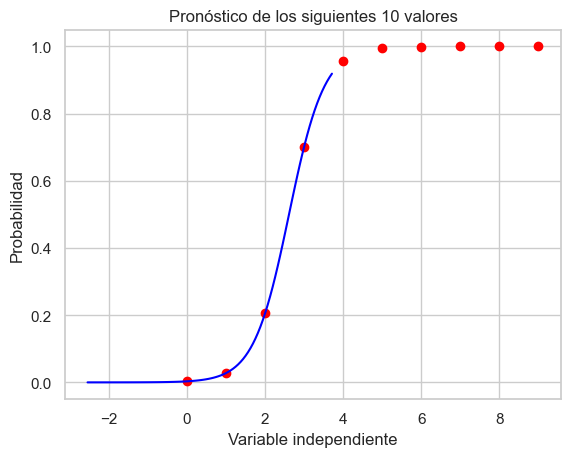

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# # Crear dataframe con los datos
# data = pd.DataFrame({
#     'nivel_de_ruido_db_': [80, 70, 60, 50, 40, 30, 20, 10],
#     'movimiento': [1, 1, 1, 0, 0, 0, 0, 0],
#     'gold_blue_diff': [0, 0, 0, 0, 1, 1, 1, 1],
#     'gold_red_diff': [0, 0, 1, 1, 1, 0, 0, 0],
#     'clase': [0, 0, 0, 1, 1, 1, 1, 1]
# })

# # Separar en variables independientes y dependiente
# X = data[['nivel_de_ruido_db_', 'movimiento', 'gold_blue_diff', 'gold_red_diff']]
# y = data['clase']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo de regresión logística y entrenarlo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluar precisión del modelo en el conjunto de prueba
accuracy = logreg.score(X_test, y_test)
print("Precisión del modelo: {:.2f}".format(accuracy))

# Imprimir ecuación de la regresión logística
coeffs = logreg.coef_.ravel()
eq_parts = [f"{col} * {coef:.2f}" for col, coef in zip(X.columns, coeffs)]
intercept = logreg.intercept_[0]
eq_parts.append(f"({intercept:.2f})")
equation = " + ".join(eq_parts)
print("Ecuación de la regresión logística: y = 1 / (1 + e^(-({})))".format(equation))

# Pronosticar los siguientes 10 valores
new_data = pd.DataFrame({'nivel_de_ruido_db_': np.arange(10), 'movimiento': np.zeros(10), 'gold_blue_diff': np.zeros(10), 'gold_red_diff': np.zeros(10)})
y_values = logreg.predict_proba(new_data)[:, 1]

# Graficar la regresión logística y los valores pronosticados
x_range = np.linspace(X.min().min(), X.max().max(), 100)
X_range = np.column_stack((x_range, np.zeros_like(x_range), np.zeros_like(x_range), np.zeros_like(x_range)))
y_range = logreg.predict_proba(X_range)[:, 1]
plt.plot(x_range, y_range, color='blue')
plt.scatter(new_data['nivel_de_ruido_db_'], y_values, color='red')
plt.title("Pronóstico de los siguientes 10 valores")
plt.xlabel("Variable independiente")
plt.ylabel("Probabilidad")
plt.show()




In [146]:
import pandas as pd
from moviepy.video.io.VideoFileClip import VideoFileClip

(Timedelta('0 days 00:00:00'), Timedelta('0 days 00:01:15'))
(Timedelta('0 days 00:01:15'), Timedelta('0 days 00:01:20'))
(Timedelta('0 days 00:01:20'), Timedelta('0 days 00:01:25'))
(Timedelta('0 days 00:01:25'), Timedelta('0 days 00:02:10'))
(Timedelta('0 days 00:02:10'), Timedelta('0 days 00:02:25'))
(Timedelta('0 days 00:02:25'), Timedelta('0 days 00:02:30'))
(Timedelta('0 days 00:02:30'), Timedelta('0 days 00:05:00'))
(Timedelta('0 days 00:05:00'), Timedelta('0 days 00:05:05'))
(Timedelta('0 days 00:05:05'), Timedelta('0 days 00:05:10'))
(Timedelta('0 days 00:05:10'), Timedelta('0 days 00:05:15'))
(Timedelta('0 days 00:05:15'), Timedelta('0 days 00:05:20'))
(Timedelta('0 days 00:05:20'), Timedelta('0 days 00:05:25'))
(Timedelta('0 days 00:05:25'), Timedelta('0 days 00:05:40'))
(Timedelta('0 days 00:05:40'), Timedelta('0 days 00:05:45'))
(Timedelta('0 days 00:05:45'), Timedelta('0 days 00:06:00'))
(Timedelta('0 days 00:06:00'), Timedelta('0 days 00:06:05'))
(Timedelta('0 days 00:06

In [43]:
import pandas as pd

# Cargar los datos desde Excel
df = pd.read_csv('clips.csv')

df.dtypes

duracion    int64
Emocion     int64
dtype: object

In [44]:
df_filtrado = df.loc[df['Emocion'] == 1]

df_filtrado

,duracion,Emocion
14,75,1
15,80,1
16,85,1
25,130,1
28,145,1
...,...,...
255,1280,1
275,1380,1
276,1385,1
277,1390,1


In [47]:
import cv2
import os
import pandas as pd

# Definir la duración de los clips a extraer
duracion_clip = 5 # segundos

# Definir el directorio donde se guardarán los clips emocionantes
dir_clips = 'clips_emocionantes'

# Crear el directorio si no existe
if not os.path.exists(dir_clips):
    os.makedirs(dir_clips)

# Inicializar variables para recorrer el video
cap = cv2.VideoCapture('Version_corta1_recortado_1635.mp4')
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
current_frame = 0

# Leer el DataFrame con los segmentos y las emociones
df = pd.read_csv('clips.csv')

# Recorrer el DataFrame y extraer los clips emocionantes
for index, row in df.iterrows():
    duracion = duracion_clip
    emocion = row['Emocion']
    if emocion == 1:
        # Calcular los frames inicial y final para el clip
        start_frame = int(row['Segundos_inicio'] * frame_rate)
        end_frame = int(row['Segundos_final'] * frame_rate)
        # Extraer el clip
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Especificar el códec a utilizar
        clip_filename = f"{dir_clips}/clip_{index}.mp4" # Cambiar el nombre del archivo para incluir el índice
        out = cv2.VideoWriter(clip_filename, fourcc, frame_rate, (int(cap.get(3)),int(cap.get(4)))) # Crear el objeto VideoWriter
        while cap.get(cv2.CAP_PROP_POS_FRAMES) < end_frame:
            ret, frame = cap.read()
            out.write(frame) # Escribir el frame actual en el clip
        out.release() # Liberar el objeto VideoWriter
    # Actualizar el frame actual
    current_frame = end_frame
    if current_frame >= total_frames:
        break

# Liberar los recursos
cap.release()
cv2.destroyAllWindows()




In [ ]:
## Primero debemos revisar el cvs de los nuevos datos del video, el nombre del nuevo video, obtener los clips 
# Usamo la ecuacion que obtuvimos de la regresion
# Y analizamos un nueo data frame con mas o menos los mismos dato para otros 20 casos.
